In [1]:
import os
from os.path import join
import numpy as np
import cv2
import matplotlib.pyplot as plt
from side_extractor import process_piece, plot_side_images
from functools import partial
import traceback
from separate_pieces import preprocess
from skimage import io

In [2]:
num_pieces = 4

In [3]:
def plot_grid(size, out_dict, *image_keys):
    h, w = size
    for idx, img_key in enumerate(image_keys, start=1):
        plt.subplot(h * 100 + w * 10 + idx)
        if img_key[0] == '_':
            plt.imshow(out_dict[img_key[1:]], cmap='gray')
        else:
            plt.imshow(out_dict[img_key])

4


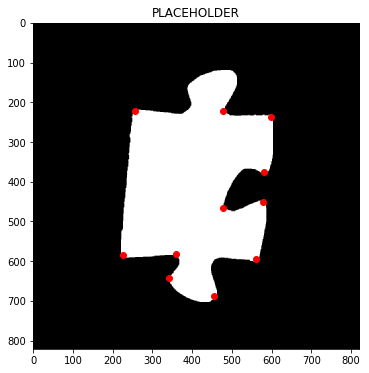

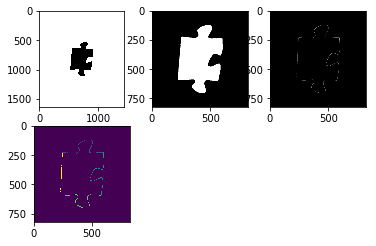

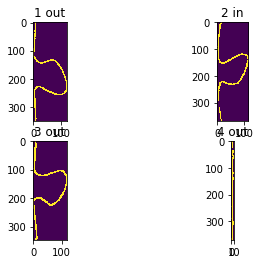

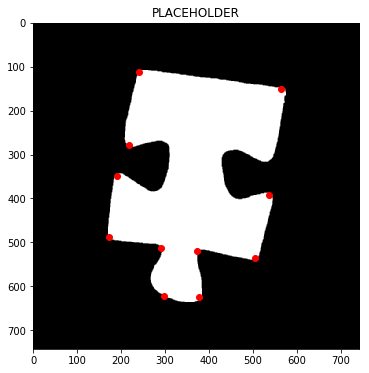

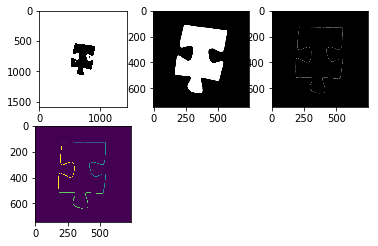

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


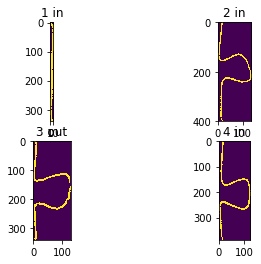

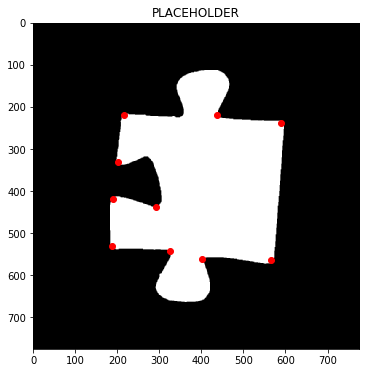

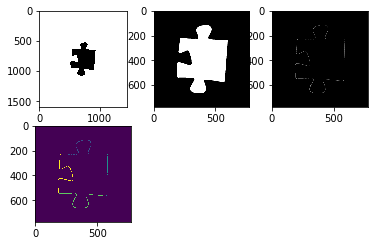

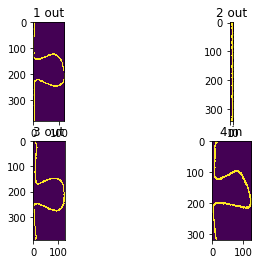

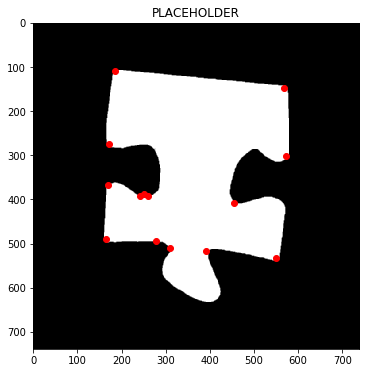

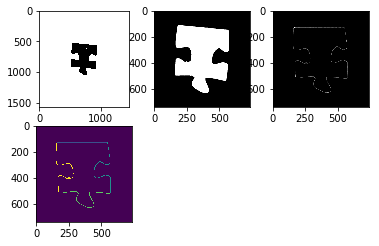

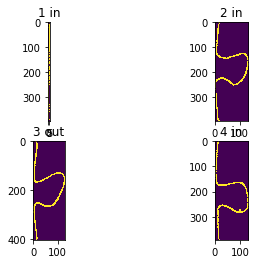

In [4]:
postprocess = partial(cv2.blur, ksize=(3, 3))
results = []
error_labels = []

img = io.imread("test_images/pic7.jpeg")
pieces = preprocess(img, num_pieces)
print(len(pieces))


for piece in pieces:
    
    out_dict = process_piece(piece, after_segmentation_func=postprocess, scale_factor=0.4, 
                             harris_block_size=5, harris_ksize=5,
                             corner_score_threshold=0.01, corner_minmax_threshold=100)
    
    plt.figure(figsize=(6, 6))
    plt.title("PLACEHOLDER")
    plt.imshow(out_dict['extracted'], cmap='gray')
    plt.scatter(out_dict['xy'][:, 0], out_dict['xy'][:, 1], color='red')
    #plt.colorbar()
    plt.show()
    
    if 'error' in out_dict:
        print("PLACEHOLDER", ':', out_dict['error'])
        error_labels.append("PLACEHOLDER")
        traceback.print_exc()
        continue
        
    else:
        
        plt.figure(figsize=(6, 6))
        plt.imshow(out_dict['class_image'])
        plot_grid((3, 3), out_dict, '_segmented', '_extracted', '_edges', 'class_image')
        plt.show()

        plot_side_images(out_dict['side_images'], out_dict['inout'])

        results.append({'side_images': out_dict['side_images'], 'inout': out_dict['inout']})

In [ ]:
to_ignore = ['D70']
for el in error_labels:
    labels.remove(el)

for label, result in zip(labels, results):
    
    if label in to_ignore:
        continue
    
    for i, (side_image, io) in enumerate(zip(result['side_images'], result['inout']), start=1):
        
        out_io = 'int' if io == 'in' else 'out'
        side_image = side_image * 255
        
        
        out_filename = "{0}_{1}_{2}.jpg".format(label, i, out_io)
        out_path = join('sides', out_filename)
        
        cv2.imwrite(out_path, side_image)

In [ ]:
img = io.imread("test_images/pic5.jpeg")
img = preprocess(img, num_pieces)[6]
plt.imshow(img)
plt.show()

In [ ]:
import skimage
import cv2
from skimage.filters import try_all_threshold
import side_extractor

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = side_extractor.segment_piece(gray)

gray = side_extractor.extract_piece(gray)
ret, labels = cv2.connectedComponents(gray)
connected_areas = [np.count_nonzero(labels == l) for l in range(1, ret)]
max_area_idx = np.argmax(connected_areas) + 1
gray[labels != max_area_idx] = 0
gray = 255 - gray
gray = side_extractor.extract_piece(gray)

kernel1 = np.ones((5,5),np.uint8)
closing1 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel1)
kernel2 = np.ones((6,6),np.uint8)
closing2 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel2)
kernel3 = np.ones((7,7),np.uint8)
closing3 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel3)

plt.imshow(img)
plt.show()             
plt.imshow(gray)
plt.show()  
plt.imshow(closing1)
plt.show()  
plt.imshow(closing2)
plt.show()  
plt.imshow(closing3)
plt.show()  
      

# fig, ax = try_all_threshold(gray, figsize=(10, 8), verbose=False)
# plt.show()

In [ ]:
import skimage

img = io.imread("test_images/pic7.jpeg")
num_pieces = 4

gray = skimage.color.rgb2gray(img)
thresh = skimage.filters.threshold_otsu(gray)
binary = 255 * (gray < thresh)

labels = skimage.measure.label(binary)
props = skimage.measure.regionprops(labels)

regions = []

regions_diam = [region.equivalent_diameter for region in props]
regions_perim = [region.perimeter for region in props]
sorted_diam = np.sort(regions_diam)
sorted_perim = np.sort(regions_perim)

for i in range(1,15):
    print(sorted_diam[-i])
    print(sorted_perim[-i])
    
plt.imshow(binary)
plt.show()